# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 100
X = np.linspace(0, 1, N)
lbda = 0.1
X[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

### 1) a)

<AxesSubplot:>

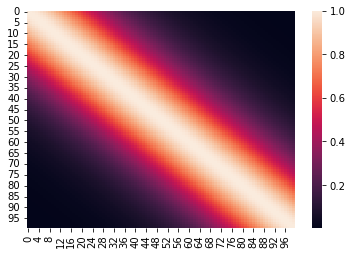

In [3]:
sigma = sigmaKov(X, X, lbda, add_noise=False)
sns.heatmap(sigma)

<AxesSubplot:>

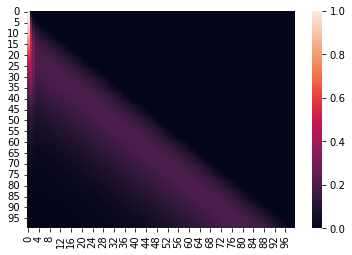

In [4]:
L = np.linalg.cholesky(sigma)
sns.heatmap(L)

Que vaut $m + L^t G$ ?

1) b)

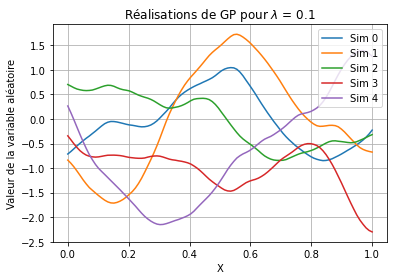

In [5]:
simulGP_gauss(X, 100, lbda)

### Question 2)

In [6]:
#N = 100
#X = np.linspace(0, 1, N)
Z = np.sin(4 * np.pi * draw_uniform_in_intervals(N))
#lbda=0.05

In [7]:
logf(lbda, X, Z, N)

12809.32690208959

In [8]:
minimize_scalar(logf, args=(X, Z, N))

     fun: -7029987564.779725
    nfev: 38
     nit: 33
 success: True
       x: -3.562331156786378

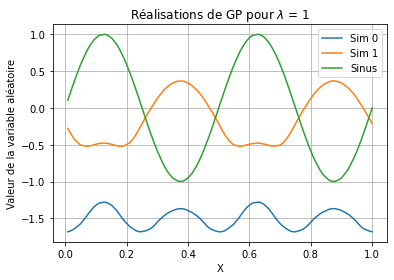

In [10]:
#minimize_scalar(neglikelihood, args=(Z))
simulGP_sin(X, N, 1)